# Домашнее задание к лекциям «Ансамблирование» и «Поиск выбросов и генерация новых признаков»

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 500)

Загружаем дата-сет и смотрим на данные:

In [192]:
data = pd.read_csv('train.csv')
target = data['SalePrice']

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Посмотрим на целевую переменную: нормальное распределение с длинным хвостом справа

In [193]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

E:\Anaconda\envs\Test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

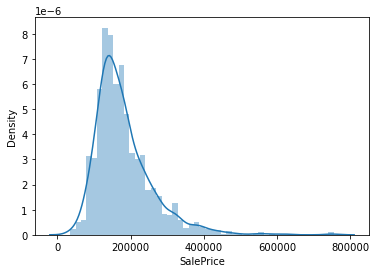

In [194]:
sns.distplot(target)

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Попробуем сначала поработать с признаками, здесь их довольно много.

Я собираюсь:

    - удалить столбец Id
    - для порядковых переменных заменить строки на числа
    - пропуски для категориальных переменных заполнить новой категорией "No_values"
    - сделать OneHotEncoding для категориальных переменных
    - заполнить пропуски
    - сделать новый признак из года постройки/продажи

In [196]:
# удаляю столбец Id

data.drop(['Id'], axis=1, inplace=True)

In [197]:
# для порядковых переменных заменяю строки на числа, а nan на -1

ex_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

mapping = {
    'Street': {'Pave': 0, 'Grvl': 1},
    'Utilities': {'NoSeWa': 0, 'AllPub': 1},
    'ExterQual': ex_map,
    'ExterCond': ex_map,
    'BsmtQual': ex_map,
    'BsmtCond': ex_map,
    'HeatingQC': ex_map,
    'CentralAir': {'Y': 1, 'N': 0},
    'KitchenQual': ex_map,
    'FireplaceQu': ex_map,
    'GarageQual': ex_map,
    'GarageCond': ex_map,
    'PoolQC': ex_map    
}

for column, map_ in mapping.items():
    data[column].replace(to_replace=map_, inplace=True)
    data[column] = data[column].fillna(-1)

In [198]:
# Выбираю все категориальные переменные, и заполняю пропуски в них новой категорией "No_values" 
# и смотрю кол-во уникальных значений по столбцам

category_columns = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
              'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
              'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional',
             'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for i, column in enumerate(category_columns):
    data[column] = data[column].fillna('No_values')
    print(column, len(data[column].value_counts()))

MSZoning 5
Alley 3
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
Foundation 6
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
Electrical 6
Functional 7
GarageType 7
GarageFinish 4
PavedDrive 3
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


In [199]:
# делаю OneHotEncoding и удаляю старые столбцы

def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

data = get_one_hot(data, category_columns)

data.drop(category_columns, axis=1, inplace=True)

data.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No_values,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No_values,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_values,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_values,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_values,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No_values,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_values,GarageFinish_Fin,GarageFinish_No_values,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_values,MiscFeature_Gar2,MiscFeature_No_values,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,Sale

In [200]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 262 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    MSSubClass              1460 non-null   int64  
 1    LotFrontage             1201 non-null   float64
 2    LotArea                 1460 non-null   int64  
 3    Street                  1460 non-null   int64  
 4    Utilities               1460 non-null   int64  
 5    OverallQual             1460 non-null   int64  
 6    OverallCond             1460 non-null   int64  
 7    YearBuilt               1460 non-null   int64  
 8    YearRemodAdd            1460 non-null   int64  
 9    MasVnrArea              1452 non-null   float64
 10   ExterQual               1460 non-null   int64  
 11   ExterCond               1460 non-null   int64  
 12   BsmtQual                1460 non-null   float64
 13   BsmtCond                1460 non-null   float64
 14   BsmtFinSF1            

У нас осталось 3 столбца с пропусками. Для простоты я удалю эти столбцы (они имеют довольно среднюю корреляцию с целевой переменной, кроме того у нас и так очень много признаков) 

In [208]:
data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']].corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


In [209]:
data = data.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)

data.head()

,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No_values,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No_values,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_values,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_values,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_values,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No_values,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_values,GarageFinish_Fin,GarageFinish_No_values,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_values,MiscFeature_Gar2,MiscFeature_No_values,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_

In [210]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 260 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    MSSubClass              1460 non-null   int64  
 1    LotArea                 1460 non-null   int64  
 2    Street                  1460 non-null   int64  
 3    Utilities               1460 non-null   int64  
 4    OverallQual             1460 non-null   int64  
 5    OverallCond             1460 non-null   int64  
 6    YearBuilt               1460 non-null   int64  
 7    YearRemodAdd            1460 non-null   int64  
 8    ExterQual               1460 non-null   int64  
 9    ExterCond               1460 non-null   int64  
 10   BsmtQual                1460 non-null   float64
 11   BsmtCond                1460 non-null   float64
 12   BsmtFinSF1              1460 non-null   int64  
 13   BsmtFinSF2              1460 non-null   int64  
 14   BsmtUnfSF             

У нас есть год постройки и год продажи дома, попробуем создать новый признак HouseAge:

In [211]:
data['HouseAge'] = data.YrSold - data.YearBuilt

data.head()

,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No_values,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No_values,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_values,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_values,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_values,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No_values,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_values,GarageFinish_Fin,GarageFinish_No_values,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_values,MiscFeature_Gar2,MiscFeature_No_values,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_

Теперь скалируем наши данные:

In [212]:
scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

df.head(20)

,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No_values,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No_values,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_values,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_values,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_values,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No_values,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_values,GarageFinish_Fin,GarageFinish_No_values,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_values,MiscFeature_Gar2,MiscFeature_No_values,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_

Признаков получилось очень много, поэтому попробуем их сократить:

In [213]:
df_transform = df

In [214]:
X = df_transform.drop(['SalePrice'], axis=1)
y = df_transform.SalePrice

In [215]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X = pca.fit_transform(X)

In [216]:
X

array([[ 3.60356973, -1.57508051,  0.95156797, ..., -0.03670407,
        -0.23577785,  0.03858586],
       [ 0.13803246,  2.98445129, -0.46897992, ...,  1.02349403,
         0.87094041, -1.73597952],
       [ 4.3706802 , -0.94517507,  0.59098431, ..., -0.39349123,
        -0.87719995,  0.57217826],
       ...,
       [ 1.12640515, -1.0451968 , -3.40132823, ..., -0.20492607,
         1.61943736,  2.52449473],
       [-2.77889226,  3.58424958,  0.46138342, ...,  0.64355985,
        -1.66986556, -0.53305065],
       [-0.92686693,  3.64846457,  0.50963628, ..., -0.54642024,
        -1.55223573, -0.04040785]])

Приступим к построению моделей. Я буду использовать библиотеку sklearn

### RandomForest

In [217]:
from sklearn.ensemble import RandomForestRegressor

In [218]:
def get_score(X, y, random_seed=42, model=None, n_estimators=100, criterion='mse', max_depth=None, min_samples_leaf=1,
             max_features='auto', n_jobs=-1, prin=True, importances=False):
    
    if model is None:
        model = RandomForestRegressor(random_state=random_seed, n_estimators=n_estimators, criterion=criterion, 
                                      max_depth=max_depth, min_samples_leaf=min_samples_leaf, 
                                      max_features=max_features, n_jobs=n_jobs)
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    
    model.fit(X_train, y_train)
    pred_values_train = model.predict(X_train)
    pred_values_test = model.predict(X_test)
    
    if prin:
        print('TRAIN')
        print('Error RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, pred_values_train))))    
        print('Score: {}'.format(model.score(X_train, y_train)))   
        print()
        print('TEST')
        print('Error RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred_values_test))))    
        print('Score: {}'.format(model.score(X_test, y_test)))     
        
    if importances:
        imp = pd.Series(model.feature_importances_)
        print(imp.sort_values(ascending=False))
    
    return np.sqrt(mean_squared_error(y_test, pred_values_test)), model.score(X_test, y_test)


Построим модель с параметрами по умолчанию:

In [219]:
get_score(X, y)

TRAIN
Error RMSE: 0.1553947804959336
Score: 0.9746961026563142

TEST
Error RMSE: 0.3503986195677973
Score: 0.8890323866510459


(0.3503986195677973, 0.8890323866510458)

Модель заметно переобучилась, попробуем настроить параметры:

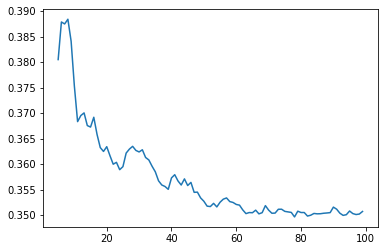

In [220]:
# n_estimators
n_estimators = []

for i in range(5, 100):
    error, score = get_score(X, y, n_estimators=i, prin=False)
    n_estimators.append(error)    
    
plt.plot(range(5, 100), n_estimators)

По графику видно, что после 15 ошибка падает незначительно. 

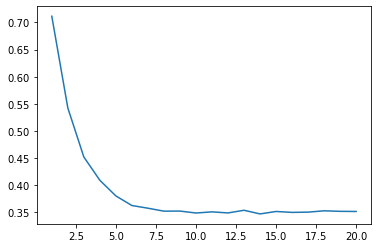

In [221]:
# max_depth
max_depth = []

for i in range(1, 21):
    error, score = get_score(X, y, max_depth=i, prin=False)
    max_depth.append(error)    
    
plt.plot(range(1, 21), max_depth)

По графику видно, что если глубина > 8 ошибка не уменьшается 

In [222]:
get_score(X, y, n_estimators=15, max_depth=8)

TRAIN
Error RMSE: 0.2013526368853461
Score: 0.95751562777729

TEST
Error RMSE: 0.3569442025096516
Score: 0.8848478270923927


(0.3569442025096516, 0.8848478270923927)

Уже лучше, но проблема с переобучением сохраняется. Остановимся на таком варианте:

In [223]:
get_score(X, y, n_estimators=15, max_depth=5, min_samples_leaf=15)

TRAIN
Error RMSE: 0.3923125140633761
Score: 0.8387206050589251

TEST
Error RMSE: 0.43529705801650803
Score: 0.8287451276853526


(0.43529705801650803, 0.8287451276853526)

Выведем важность признаков

In [224]:
get_score(X, y, n_estimators=15, max_depth=5, min_samples_leaf=15,
         prin=False, importances=True)

0     0.875909
3     0.062028
2     0.038198
8     0.009705
26    0.002532
21    0.002438
15    0.001935
9     0.001452
1     0.001273
28    0.001052
10    0.000894
19    0.000498
23    0.000401
7     0.000364
14    0.000248
11    0.000245
18    0.000231
24    0.000167
27    0.000165
4     0.000111
20    0.000106
22    0.000048
17    0.000000
6     0.000000
16    0.000000
5     0.000000
13    0.000000
25    0.000000
12    0.000000
29    0.000000
dtype: float64


(0.43529705801650803, 0.8287451276853526)

### Вопрос:

Я так и не поняла, как правильно интерпретировать признаки при уменьшении размерности через РСА. Например, здесь по коэффициентам видно, что основную роль сыграль один единственный признак, но это не признак из нашего начального дата-сета. Какой лучший способ для уменьшения размерности на примере этого дата-сета?

### Cтекинг

In [225]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [227]:
boosting_params = {'n_estimators': 250,
                  'criterion': 'mse',
                  'max_depth': 5,
                  'min_samples_leaf': 15,
                  'random_state': 42}    

forest_params = {'n_estimators': 15,
                  'max_depth': 5,
                  'min_samples_leaf': 15,
                  'n_jobs': -1,
                  'random_state': 42}   

def fit_models(X, y, models=[], meta=None, type_model='stacking', random_seed=42):
        
    
    if type_model == 'stacking':
        model = StackingRegressor(models, meta)
        
    if type_model == 'linear':
        model = LinearRegression()
        
    if type_model == 'boosting':     
        model = GradientBoostingRegressor(**boosting_params)
        
    if type_model == 'forest': 
        model = RandomForestRegressor(**forest_params)
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    
    model.fit(X_train, y_train)
    pred_values_train = model.predict(X_train)
    pred_values_test = model.predict(X_test)
    
    if type_model == 'stacking':
        for i, model_name in enumerate(models):
            print(model_name[0])
            print('TRAIN')
            pred_values_model_train = model.named_estimators_[model_name[0]].predict(X_train)
            print('Error RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, pred_values_model_train))))    
            print('Score: {}'.format(model.score(X_train, pred_values_model_train)))   
            print()
            print('TEST')
            pred_values_model_test = model.named_estimators_[model_name[0]].predict(X_test)
            print('Error RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred_values_model_test))))    
            print('Score: {}'.format(model.score(X_test, pred_values_model_test)))     
            print()
        
        
    print('RESALT')
    print('TRAIN')
    print('Error RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, pred_values_train))))    
    print('Score: {}'.format(model.score(X_train, y_train)))   
    print()
    print('TEST')
    print('Error RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred_values_test))))    
    print('Score: {}'.format(model.score(X_test, y_test)))     

Сначала построим отдельные модели:

<b><i>Линейная регрессия</i><b>

In [228]:
fit_models(X, y, type_model='linear')

RESALT
TRAIN
Error RMSE: 0.4428793591264169
Score: 0.7944651632887714

TEST
Error RMSE: 0.44875470453797545
Score: 0.8179924090045543


<b><i>Градиентный бустинг</i><b>

In [229]:
fit_models(X, y, type_model='boosting')

RESALT
TRAIN
Error RMSE: 0.0887335859619765
Score: 0.9917493031940506

TEST
Error RMSE: 0.38084620721370477
Score: 0.8689096442178776


<b><i>Случайный лес</i><b>

In [230]:
fit_models(X, y, type_model='forest')

RESALT
TRAIN
Error RMSE: 0.3923125140633761
Score: 0.8387206050589251

TEST
Error RMSE: 0.43529705801650803
Score: 0.8287451276853526


Отдельно построенные модели дают неплохие результаты, выше всего Градиентный бустинг, но модель очень переобучена.

Попробуем построить стекинг, моделью 2-го уровня выберем случайный лес:

In [231]:
fit_models(X, y, models=[('LinearRegression', LinearRegression()),
                    ('GradientBoostingRegressor', GradientBoostingRegressor(**boosting_params)), 
                    ('RandomForestRegressor', RandomForestRegressor(**forest_params))
                   ],
             meta=RandomForestRegressor(**forest_params))

LinearRegression
TRAIN
Error RMSE: 0.4428793591264169
Score: 0.9060542449560038

TEST
Error RMSE: 0.44875470453797545
Score: 0.9256660723672295

GradientBoostingRegressor
TRAIN
Error RMSE: 0.0887335859619765
Score: 0.9330877148286311

TEST
Error RMSE: 0.38084620721370477
Score: 0.9678687237887473

RandomForestRegressor
TRAIN
Error RMSE: 0.392312514063376
Score: 0.9390487642595116

TEST
Error RMSE: 0.43529705801650803
Score: 0.9358976171540677

RESALT
TRAIN
Error RMSE: 0.2966108251903637
Score: 0.9078089934732821

TEST
Error RMSE: 0.3774395936506326
Score: 0.871244323703867


Как видно из результатов, стекинг показывает лучее значение. Score чуть выше, чем отдельно построенный бустинг, но в стекинге значительно меньше переобучение.

Как ни странно, но похожие результаты у меня получились при использовании только числовых и порядковых признаков без OneHot, при таком подходе удалось обойтись без уменьшения размерности и сохранить интерпретируемость, а ключивым признаком стал OverallQual.